320180942261 - 朱廷渊 - (homework11)

所做工作:<br/>
    1.以下所有操作均采用10折交叉验证<br/>
    2.通过GridSearch, 分别对svm, naive_bayes, decision_tree, LogisticRegression的部分参数进行参数寻优<br/>
    3.分别对svm, naive_bayes, decision_tree, LogisticRegression, 进行Nest cross validaion, 此处选用网格搜索嵌套交叉验证<br/>
    4.分别对svm, naive_bayes, decision_tree, LogisticRegression选定寻优后的参数, 作出roc_curve, 并计算出auc的值<br/>
    5.分别对svm, naive_bayes, decision_tree, LogisticRegression选定寻优后的参数, 作出learning_curve<br/>
    6.分别对svm, naive_bayes, decision_tree, LogisticRegression选定寻优后的参数, 作出validation_curve<br/>
   
备注:<br/>
1.使用的sklearn版本为0.21, 部分库的参数, 方法与最新的0.22不一致<br/>
2.后三个三个作图使用的参数是由前面的参数寻优得到的
3.详细说明以注释的方式在相应位置

# 所用库的导入以及数据预处理

In [1]:
#导入相关库以及通过StandardScaler对数据进行缩放, 服从标准正态分布
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, ShuffleSplit, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import StandardScaler, label_binarize
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris.data
y = iris.target
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)  

# 参数寻优(GridSearchCV)

### 使用模型: svm, naive_bayes, decision_tree, LogisticRegression

In [2]:
# parameter estimation
# 对svm的kernel, C 进行参数寻优
#对kernel, 建立参数列表['rbf','linear'], 对C, 建立参数列表1-10
parameters = {'kernel': ('rbf', 'linear'), 'C': list(range(1, 11))}
svc = SVC(gamma='scale')
clf = GridSearchCV(svc, parameters, cv=10)
Grid = clf.fit(X, y)

print('best parameters: {}'.format(Grid.best_params_))
print('best score: {}'.format(Grid.best_score_))

best parameters: {'C': 5, 'kernel': 'linear'}
best score: 0.9733333333333334


In [3]:
# 对naive_bayes的var_smoothing进行参数寻优

# 对var_smoothing, 建立1e-9到1e-1的参数列表, 为包含10个元素的等比数列
parameters = {'var_smoothing': list(np.logspace(-9, -1, 10))}
naive_bayes = GaussianNB()
clf = GridSearchCV(naive_bayes, parameters, cv=10)
Grid = clf.fit(X, y)
print('best parameters: {}'.format(Grid.best_params_))
print('best score: {}'.format(Grid.best_score_))

best parameters: {'var_smoothing': 1e-09}
best score: 0.9533333333333334


In [4]:
# 对逻辑回归的C进行参数寻优
parameters = {'C': list(range(1, 11))}
Logreg = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='ovr')
clf = GridSearchCV(Logreg, parameters, cv=10)
Grid = clf.fit(X, y)
print('best parameters: {}'.format(Grid.best_params_))
print('best score: {}'.format(Grid.best_score_))

best parameters: {'C': 10}
best score: 0.96


In [5]:
# 对decision tree的max_depth, criterion进行参数寻优
parameters = {'max_depth': list(range(1, 11)), 'criterion': [
    "gini", "entropy"]}
decision_tree = DecisionTreeClassifier()
clf = GridSearchCV(decision_tree, parameters, cv=10)
Grid = clf.fit(iris.data, iris.target)
print('best parameters: {}'.format(Grid.best_params_))
print('best score: {}'.format(Grid.best_score_))

best parameters: {'criterion': 'gini', 'max_depth': 3}
best score: 0.96


# Nest cross validation(此处采用网格搜索嵌套交叉验证, 寻优的参数与上面网格搜索相同)

### 使用模型: svm, naive_bayes, decision_tree, LogisticRegression

In [6]:
# 对svm进行网格搜索嵌套交叉验证
svm_clf = SVC(gamma='scale')
parameters = {'kernel': ('rbf', 'linear'), 'C': list(range(1, 11))}
clf = GridSearchCV(svm_clf, parameters, cv=10, iid=True)
Grid = clf.fit(X, y)
score = cross_val_score(Grid, X, y, scoring='accuracy', cv=10)
print(np.mean(score))
print('best parameters:{}'.format(Grid.best_params_))

0.9533333333333334
best parameters:{'C': 5, 'kernel': 'linear'}


In [7]:
# 对naive_bayes进行网格搜索嵌套交叉验证
naive_bayes = GaussianNB()
parameters = {'var_smoothing': list(np.logspace(-9, -1, 10))}
clf = GridSearchCV(naive_bayes, parameters, cv=10, iid=True)
Grid = clf.fit(X, y)
score = cross_val_score(Grid, X, y, scoring='accuracy', cv=10)
print(np.mean(score))
print('best parameters:{}'.format(Grid.best_params_))

0.9533333333333334
best parameters:{'var_smoothing': 1e-09}


In [8]:
# 对decision_tree进行网格搜索嵌套交叉验证
decision_tree = DecisionTreeClassifier()
parameters = {'max_depth': list(range(1, 11)), 'criterion': [
    "gini", "entropy"]}
clf = GridSearchCV(decision_tree, parameters, cv=10, iid=True)
Grid = clf.fit(X, y)
score = cross_val_score(Grid, X, y, scoring='accuracy', cv=10)
print(np.mean(score))
print('best parameters:{}'.format(Grid.best_params_))

0.96
best parameters:{'criterion': 'gini', 'max_depth': 3}


In [9]:
# 对逻辑回归进行网格搜索嵌套交叉验证
Logreg = LogisticRegression(penalty='l2', solver='lbfgs', multi_class='ovr')
parameters = {'C': list(range(1, 11))}
clf = GridSearchCV(Logreg, parameters, cv=10, iid=True)
Grid = clf.fit(X, y)
score = cross_val_score(Grid, X, y, scoring='accuracy', cv=10)
print(np.mean(score))
print('best parameters:{}'.format(Grid.best_params_))

0.96
best parameters:{'C': 10}


# ROC_curve

### 使用模型:svm, naive_bayes, decision_tree, LogisticRegression

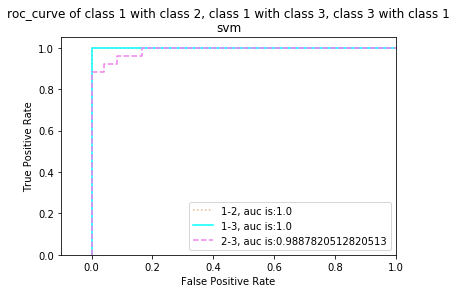

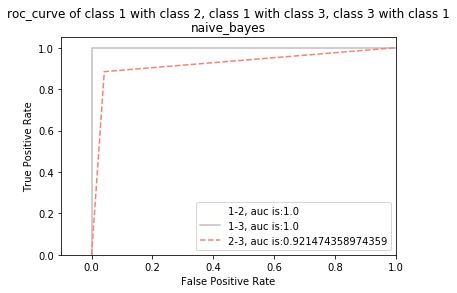

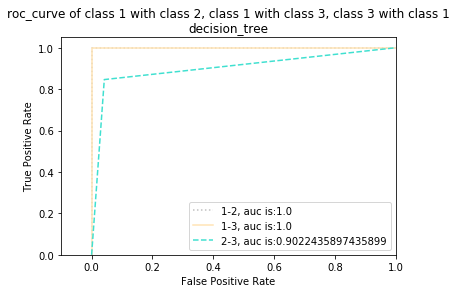

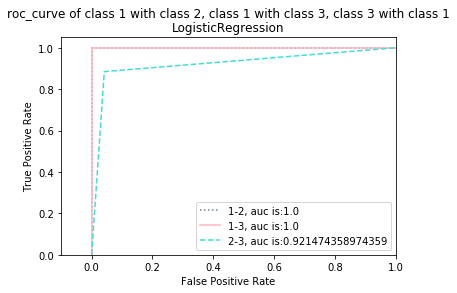

In [20]:
"""
roc曲线用于二分类, 因为iris是数据集有三类, 因此分别作出第一类和第二类, 第一类和第三类,
第二类和第三类通过svm Naive-bayes分类后的roc曲线 
"""
# 将标签二值化
"""
二值化意指: 1 = [1,0,0]
           2 = [0,1,0]
           3 = [0,0,1]
"""
y_bin = label_binarize(y, classes=[0, 1, 2])


def svm_clf(X, y, test_size=0.5):
    """
    对数据集进行切分, 使用svm进行fit,并得到decision_function的分数用于计算fpr和tpy
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0)
    clf = SVC(kernel='linear', C=5, probability=True,
                  random_state=0, gamma='scale')
    y_score = clf.fit(X_train, y_train).decision_function(X_test)
    return y_test, y_score


def naive_bayes_clf(X, y, test_size=0.5):
    """
    对数据集进行切分, 使用naive_bayes进行fit,并得到decision_function的分数用于计算fpr和tpr
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0)
    clf = GaussianNB(var_smoothing=1e-09)
    y_score = clf.fit(X_train, y_train).predict(X_test)
    return y_test, y_score


def decision_tree_clf(X, y, test_size=0.5):
    """
    对数据集进行切分, 使用decision_tree进行fit,并得到decision_function的分数用于计算fpr和tpr
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0)
    clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
    y_score = clf.fit(X_train, y_train).predict(X_test)
    return y_test, y_score


def Logreg_clf(X, y, test_size=0.5):
    """
    对数据集进行切分, 使用逻辑回归进行fit,并得到decision_function的分数用于计算fpr和tpr
    """
    c_test = 10
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0)
    clf = LogisticRegression(C=c_test, penalty='l2',
                             solver='lbfgs', multi_class='ovr')
    y_score = clf.fit(X_train, y_train).predict(X_test)
    return y_test, y_score


def two_class_roc_plot(X, y, models, models_name, colors):
    """
    将iris的数据切分, 分别分为1-2(第一类和第二类),1-3(第一类和第三类),2-3(第二类和第三类),
    并分别用svm进行fit,调用svm_clf()得到y_score和划分后(此处按1:1划分)的测试集y_test,
    并通过roc_curve计算得到fpr, tpr, 进行作图
    """
    X_first_second, y_first_second = X[0:100], y[0:100][:, 0]
    X_first_third, y_first_third = np.concatenate(
        (X[0:50], X[100:150]), axis=0), np.concatenate((y[0:50], y[100:150]), axis=0)[:, 0]
    X_second_third, y_second_third = X[50:150], y[50:150][:, 1]
    y_test_first_second, y_score_first_second = models(
        X_first_second, y_first_second)
    y_test_first_third, y_score_first_third = models(
        X_first_third, y_first_third)
    y_test_second_third, y_score_second_third = models(
        X_second_third, y_second_third)
    fpr = dict()
    tpr = dict()
    fpr['1-2'], tpr['1-2'], _ = roc_curve(y_test_first_second,
                                          y_score_first_second)
    fpr['1-3'], tpr['1-3'], _ = roc_curve(y_test_first_third,
                                          y_score_first_third)
    fpr['2-3'], tpr['2-3'], _ = roc_curve(y_test_second_third,
                                          y_score_second_third)
    plt.plot(fpr['1-2'], tpr['1-2'], linestyle=':', color=colors[0],
             label='1-2, auc is:{}'.format(auc(fpr['1-2'], tpr['1-2'])))
    plt.plot(fpr['1-3'], tpr['1-3'], linestyle='-', color=colors[1],
             label='1-3, auc is:{}'.format(auc(fpr['1-3'], tpr['1-3'])))
    plt.plot(fpr['2-3'], tpr['2-3'], linestyle='--', color=colors[2],
             label='2-3, auc is:{}'.format(auc(fpr['2-3'], tpr['2-3'])))
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('roc_curve of class 1 with class 2, class 1 with class 3, class 3 with class 1\n{}'.format(
        models_name))
    plt.legend(loc="lower right")

    plt.show()


two_class_roc_plot(X, y_bin, svm_clf, 'svm', colors=[
                   '#DEB887', '#00FFFF', '#EE82EE'])
two_class_roc_plot(X, y_bin, naive_bayes_clf, 'naive_bayes',
                   colors=['#FFFFE0', '#C0C0C0', '#FA8072'])
two_class_roc_plot(X, y_bin, decision_tree_clf, 'decision_tree',
                   colors=['#C0C0C0', '#FFE4B5', '#40E0D0'])
two_class_roc_plot(X, y_bin, Logreg_clf, 'LogisticRegression',
                   colors=['#708090', '#FFB6C1', '#40E0D0'])


# learning curve

### 使用模型: svm, naive_bayes, decision_tree, LogisticRegression

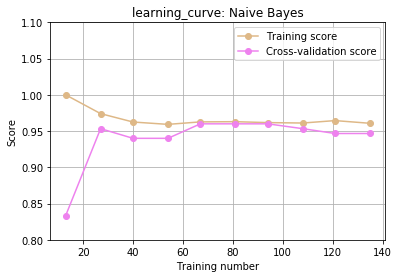

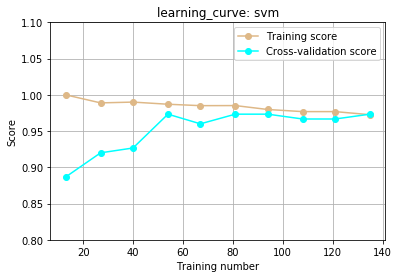

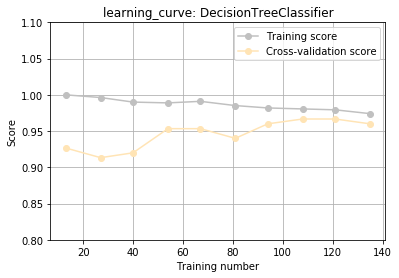

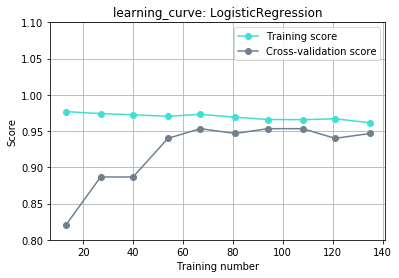

In [15]:
def learning_curve_plot(estimator, title, X, y, n_splits, colors):
    """采用乱序交叉验证ShuffleSplit,以下划分数全取10"""
    cv = ShuffleSplit(n_splits=n_splits, test_size=0.1, random_state=0)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10))
    plt.figure()
    plt.title('learning_curve: ' + title)
    plt.ylim(0.8, 1.1)
    plt.xlabel("Training number")
    plt.ylabel("Score")
    plt.grid()
    # 做出对应learning_curve图像
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color=colors[0],
             label="Training score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color=colors[1],
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt


# 朴素贝叶斯
title = "Naive Bayes"
estimator = GaussianNB(var_smoothing=1e-09)
learning_curve_plot(estimator, title, X, y, 10, colors=['#DEB887', '#EE82EE'])

# 支持向量机
title = 'svm'
# SVC is more expensive so we do a lower number of CV iterations:
estimator = SVC(kernel='linear', C=5, probability=True,
                random_state=0, gamma='scale')
learning_curve_plot(estimator, title, X, y, 10, colors=['#DEB887', '#00FFFF'])

# 决策树
title = 'DecisionTreeClassifier'
estimator = DecisionTreeClassifier(criterion='gini', max_depth=3)
learning_curve_plot(estimator, title, X, y, 10, colors=['#C0C0C0', '#FFE4B5'])

# 逻辑回归
title = 'LogisticRegression'
c_test = 10
#使用l1正则化, liblinear未能快速收敛, 此处采用l2正则化
estimator = LogisticRegression(
    C=c_test, penalty='l2', solver='lbfgs', multi_class='ovr')
learning_curve_plot(estimator, title, X, y, 10, colors=['#40E0D0', '#708090'])
plt.show()

# validation curve

### 使用模型: svm, naive_bayes, decision_tree, LogisticRegression

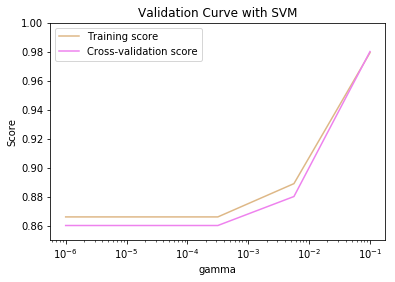

In [16]:
"""validation_curve : 做出一系列超参数的训练分数和验证分数,横轴为超参数, 纵轴为分数 """
#svm: 参数gamma的调节

#构造gamma参数列表, 指数递增10-x次方
param_range = np.logspace(-6, -1, 5)
#计算validation_curve上的点
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10)
plt.title("Validation Curve with SVM")
plt.xlabel("gamma")
plt.ylabel("Score")
plt.ylim(0.85, 1.0)
#因为gamma参数采用指数递增, 因此用semilogx:将x以对数缩放进行作图, 对10次交叉验证的结果求mean为Score
plt.semilogx(param_range, np.mean(train_scores, axis=1), label="Training score",
             color='#DEB887')
plt.semilogx(param_range, np.mean(test_scores, axis=1), label="Cross-validation score",
             color='#EE82EE')

plt.legend(loc="best")
plt.show()

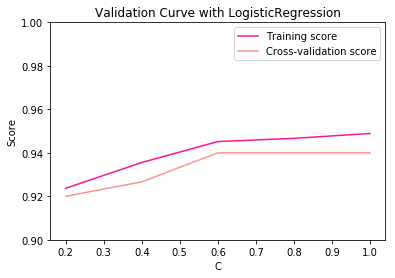

In [17]:
"""validation_curve : 做出一系列超参数的训练分数和验证分数,横轴为超参数, 纵轴为分数 """
#LogisticRegression: 参数C的调节
iris = datasets.load_iris()
X = iris.data
y = iris.target
# 构造C参数列表
param_range = [0.2, 0.4, 0.6, 0.8, 1.0]
# 计算validation_curve上的点
train_scores, test_scores = validation_curve(
    LogisticRegression(penalty='l2', solver='lbfgs', multi_class='ovr'), X, y, param_name="C", param_range=param_range,
    cv=10)
plt.title("Validation Curve with LogisticRegression")
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
#作图, 对10次交叉验证的结果求mean为Score
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score",
         color="#FF1493")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score",
         color="#FF9391")

plt.legend(loc="best")
plt.show()

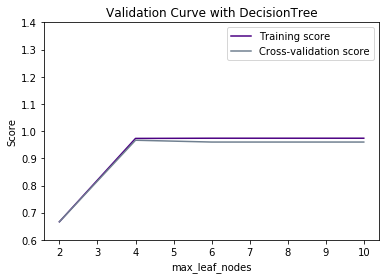

In [18]:
"""validation_curve : 做出一系列超参数的训练分数和验证分数,横轴为超参数, 纵轴为分数 """
#decisiontree: 参数max_leaf_nodes的调节
# 构造max_leaf_nodes参数列表
param_range = range(2, 11, 2)
# 计算validation_curve上的点
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(criterion='gini', max_depth=3), X, y, param_name="max_leaf_nodes", param_range=param_range,
    cv=10)
plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_leaf_nodes")
plt.ylabel("Score")
plt.ylim(0.6, 1.4)

plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score",
         color="#4B0082")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score",
         color="#708090")

plt.legend(loc="best")
plt.show()

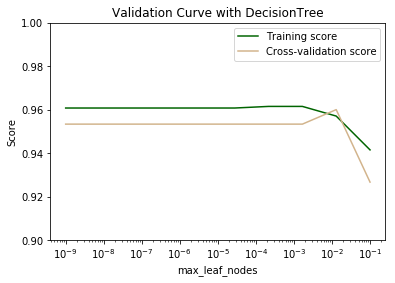

In [19]:
"""validation_curve : 做出一系列超参数的训练分数和验证分数,横轴为超参数, 纵轴为分数 """
#naive_bayes: 参数var_smoothing的调节
#构造var_smoothing参数列表, 指数递增
param_range = np.logspace(-9, -1, 10)
# 计算validation_curve上的点
train_scores, test_scores = validation_curve(
    GaussianNB(), X, y, param_name="var_smoothing", param_range=param_range,
    cv=10)
plt.title("Validation Curve with DecisionTree")
plt.xlabel("max_leaf_nodes")
plt.ylabel("Score")
plt.ylim(0.9, 1.0)
#因为var_smoothing是以指数递增, 因此作图时对横轴采用指数缩放
plt.semilogx(param_range, np.mean(train_scores, axis=1), label="Training score",
             color="#006400")
plt.semilogx(param_range, np.mean(test_scores, axis=1), label="Cross-validation score",
             color="#D2B48C")

plt.legend(loc="best")
plt.show()